## Hyper Parameter Estimation

Reproduce plots for the experiments inspecting the selected hyper parameters in comparison to the test set performance, see Section 4.2.3 and Figure 3.

In [11]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

sys.path.append(".")
from local_utils import IDIR_CASMI, IDIR_EA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
D_range = [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.25, 0.35, 0.5]

### "Sigmoid" Edge Potential Function

**Load Data:**

In [4]:
## Load CASMI 

# Positive
_idir = IDIR_CASMI(
    tree_method="random", n_random_trees=32, ion_mode="positive", D_value_method=None,
    base_dir="../CASMI_2016/results__TFG__platt", mode="development", 
    param_selection_measure=None, make_order_prob="sigmoid",
    norm_order_scores=False, margin_type="max")

_msr_CAS_pos = pd.read_csv(os.path.join(_idir, "measures.csv"))
_msr_CAS_pos["Dataset"] = "CASMI 2016"
_msr_CAS_pos["Ionization"] = "Positive"

_msr_CAS_pos_baseline = _msr_CAS_pos[_msr_CAS_pos.D == 0]
_msr_CAS_pos = _msr_CAS_pos[_msr_CAS_pos.D != 0]

_idir = IDIR_CASMI(
    tree_method="random", n_random_trees=32, ion_mode="positive", D_value_method=None,
    base_dir="../CASMI_2016/results__TFG__platt", mode="application", 
    param_selection_measure="topk_auc", make_order_prob="sigmoid",
    norm_order_scores=False, margin_type="max")

_opt_CAS_pos = pd.read_csv(os.path.join(_idir, "opt_params.csv"))
_opt_CAS_pos["Dataset"] = "CASMI 2016"
_opt_CAS_pos["Ionization"] = "Positive"

# Negative
_idir = IDIR_CASMI(
    tree_method="random", n_random_trees=32, ion_mode="negative", D_value_method=None,
    base_dir="../CASMI_2016/results__TFG__platt", mode="development", 
    param_selection_measure=None, make_order_prob="sigmoid",
    norm_order_scores=False, margin_type="max")

_msr_CAS_neg = pd.read_csv(os.path.join(_idir, "measures.csv"))
_msr_CAS_neg["Dataset"] = "CASMI 2016"
_msr_CAS_neg["Ionization"] = "Negative"

_msr_CAS_neg_baseline = _msr_CAS_neg[_msr_CAS_neg.D == 0]
_msr_CAS_neg = _msr_CAS_neg[_msr_CAS_neg.D != 0]

_idir = IDIR_CASMI(
    tree_method="random", n_random_trees=32, ion_mode="negative", D_value_method=None,
    base_dir="../CASMI_2016/results__TFG__platt", mode="application", 
    param_selection_measure="topk_auc", make_order_prob="sigmoid",
    norm_order_scores=False, margin_type="max")

_opt_CAS_neg = pd.read_csv(os.path.join(_idir, "opt_params.csv"))
_opt_CAS_neg["Dataset"] = "CASMI 2016"
_opt_CAS_neg["Ionization"] = "Negative"


## Load EA

# Positive
_idir = IDIR_EA(
    tree_method="random", n_random_trees=32, ion_mode="positive", D_value_method=None,
    base_dir="../EA_Massbank/results__TFG__platt", mode="development", 
    param_selection_measure=None, make_order_prob="sigmoid",
    norm_scores="none", margin_type="max")

_msr_EA_pos = pd.read_csv(os.path.join(_idir, "measures.csv"))
_msr_EA_pos["Dataset"] = "EA (Massbank)"
_msr_EA_pos["Ionization"] = "Positive"

# Take only 50 samples from this dataset to not bias the plots
_msr_EA_pos_baseline = _msr_EA_pos[(_msr_EA_pos.D == 0) & (_msr_EA_pos["sample"] < 50)]
_msr_EA_pos = _msr_EA_pos[(_msr_EA_pos.D != 0) & (_msr_EA_pos["sample"] < 50)]

_idir = IDIR_EA(
    tree_method="random", n_random_trees=32, ion_mode="positive", D_value_method=None,
    base_dir="../EA_Massbank/results__TFG__platt", mode="application", 
    param_selection_measure="topk_auc", make_order_prob="sigmoid",
    norm_scores="none", margin_type="max")

_opt_EA_pos = pd.read_csv(os.path.join(_idir, "opt_params.csv"))
_opt_EA_pos["Dataset"] = "EA (Massbank)"
_opt_EA_pos["Ionization"] = "Positive"
_opt_EA_pos = _opt_EA_pos[_opt_EA_pos["sample"] < 50]


# Negative
_idir = IDIR_EA(
    tree_method="random", n_random_trees=32, ion_mode="negative", D_value_method=None,
    base_dir="../EA_Massbank/results__TFG__platt", mode="development", 
    param_selection_measure=None, make_order_prob="sigmoid",
    norm_scores="none", margin_type="max")

_msr_EA_neg = pd.read_csv(os.path.join(_idir, "measures.csv"))
_msr_EA_neg["Dataset"] = "EA (Massbank)"
_msr_EA_neg["Ionization"] = "Negative"

_msr_EA_neg_baseline = _msr_EA_neg[_msr_EA_neg.D == 0]
_msr_EA_neg = _msr_EA_neg[_msr_EA_neg.D != 0]

_idir = IDIR_EA(
    tree_method="random", n_random_trees=32, ion_mode="negative", D_value_method=None,
    base_dir="../EA_Massbank/results__TFG__platt", mode="application", 
    param_selection_measure="topk_auc", make_order_prob="sigmoid",
    norm_scores="none", margin_type="max")

_opt_EA_neg = pd.read_csv(os.path.join(_idir, "opt_params.csv"))
_opt_EA_neg["Dataset"] = "EA (Massbank)"
_opt_EA_neg["Ionization"] = "Negative"

# Put all results together
msr__sig = pd.concat((_msr_EA_pos, _msr_EA_neg, _msr_CAS_pos, _msr_CAS_neg))
msr_baseline__sig = pd.concat((_msr_EA_pos_baseline, _msr_EA_neg_baseline, _msr_CAS_pos_baseline, _msr_CAS_neg_baseline))
opt__sig = pd.concat((_opt_EA_pos, _opt_EA_neg, _opt_CAS_pos, _opt_CAS_neg))
msr__sig.head()

,D,k,ndcg,p_marg,p_max,sample,set,top1,top10,top20,top3,top5,topk_auc,un_p_marg,un_topk_auc,Dataset,Ionization
0,0.001,1.057095,0.475180,-230.274725,-0.029726,0,train,20.0,74.0,82.0,46.0,54.0,0.660,-5.841931,0.660,EA (Massbank),Positive
1,0.005,1.057095,0.475537,-230.243336,-0.136853,0,train,20.0,74.0,82.0,46.0,54.0,0.661,-5.766774,0.661,EA (Massbank),Positive
2,0.010,1.057095,0.477248,-230.212680,-0.248276,0,train,20.0,74.0,82.0,48.0,54.0,0.663,-5.697532,0.663,EA (Massbank),Positive
3,0.050,1.057095,0.483851,-230.062941,-0.781813,0,train,22.0,74.0,82.0,46.0,56.0,0.669,-5.449894,0.669,EA (Massbank),Positive
4,0.100,1.057095,0.483983,-230.067875,-1.242766,0,train,22.0,74.0,80.0,48.0,62.0,0.674,-5.296201,0.674,EA (Massbank),Positive


**Plot:**

[ 6  2  5 31 24 35 52 29 16]


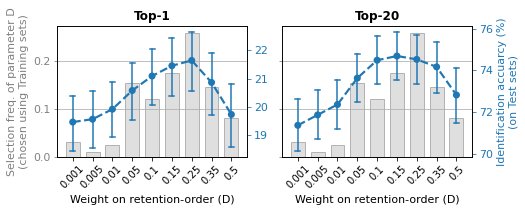

In [5]:
_msr_test__sig = msr__sig[(msr__sig.set == "test")].reset_index()
_msr_baseline__sig_test = msr_baseline__sig[(msr_baseline__sig.set == "test")].reset_index()
_msr_train__sig = msr__sig[(msr__sig.set == "train")].reset_index()
_opt__sig = _msr_train__sig.iloc[_msr_train__sig.groupby(["sample", "Dataset", "Ionization"]).idxmax()["topk_auc"]]

cts__sig = np.array([np.sum(_opt__sig.D == D) for D in D_range])
print(cts__sig)
_x = np.arange(len(D_range))

fig, axrr = plt.subplots(1, 2, figsize=(7.5, 3), sharey="all")

for i, k in enumerate([1, 20]):
    ax_bar = axrr[i]
    ax_line = axrr[i].twinx()
    
    # Line-plot
    sns.pointplot(data=_msr_test__sig, x="D", y="top%d" % k, linestyles="--", errwidth=1.5, capsize=0.25, scale=0.8, ax=ax_line, seed=2020)
    ax_line.set_ylabel("")    
    #ax_line.hlines(_msr_baseline_test["top%d" % k].mean(), -0.25, 8.25, color=sns.color_palette()[0])

    # Bar-plot
    ax_bar.bar(x=_x, height=cts__sig / cts__sig.sum(), width=0.7, alpha=0.25, edgecolor="black", color="grey")
    ax_bar.grid(axis="y")
    
    axrr[i].set_xlabel("Weight on retention-order (D)", fontsize=11)
    axrr[i].set_title("Top-%d" % k, fontweight="bold", fontsize=12)
    axrr[i].set_xticklabels(ax_line.get_xticklabels(), rotation=45)
    
    ax_line.tick_params(axis="y", colors=sns.color_palette()[0], labelsize=11)
    ax_bar.tick_params(axis="y", colors="gray", labelsize=11)
    
    if i == 0:
        ax_bar.set_ylabel("Selection freq. of parameter D\n(chosen using Training sets)", fontsize=11, color="gray")
    if i == 1:
        ax_line.set_ylabel("Identification accuarcy (%)\n(on Test sets)", fontsize=11, color=sns.color_palette()[0])

plt.tight_layout()

- We observe a good correlation between the test set performance and selected D parameters.
- We could select the D parameter in a different way:
  - 1) Run a could (50) random (ms,rt)-tuple samples through the score-integration
  - 2) Do that for your D parameter grid
  - 3) Get the average identification performance for each D value
  - 4) Choose the best one for your application 
- The D parameter needs to be calibrated to your MS2 scoring and Retention order prediction
- What we can see for individual datasets is, that we can outperform the baseline even further, by fixing the "correct" D
- However, in the current setup we cannot really do that, as we have only one training set. 

### "Step-Function" Edge Potential Function

**Load Data:**

In [8]:
## Load CASMI 

# Positive
_idir = IDIR_CASMI(
    tree_method="random", n_random_trees=32, ion_mode="positive", D_value_method=None,
    base_dir="../CASMI_2016/results__TFG__gridsearch", mode="development", 
    param_selection_measure=None, make_order_prob="stepfun",
    norm_order_scores=False, margin_type="max")

_msr_CAS_pos = pd.read_csv(os.path.join(_idir, "measures.csv"))
_msr_CAS_pos["Dataset"] = "CASMI 2016"
_msr_CAS_pos["Ionization"] = "Positive"

_msr_CAS_pos_baseline = _msr_CAS_pos[_msr_CAS_pos.D == 0]
_msr_CAS_pos = _msr_CAS_pos[_msr_CAS_pos.D != 0]

_idir = IDIR_CASMI(
    tree_method="random", n_random_trees=32, ion_mode="positive", D_value_method=None,
    base_dir="../CASMI_2016/results__TFG__gridsearch", mode="application", 
    param_selection_measure="topk_auc", make_order_prob="stepfun",
    norm_order_scores=False, margin_type="max")

_opt_CAS_pos = pd.read_csv(os.path.join(_idir, "opt_params.csv"))
_opt_CAS_pos["Dataset"] = "CASMI 2016"
_opt_CAS_pos["Ionization"] = "Positive"

# Negative
_idir = IDIR_CASMI(
    tree_method="random", n_random_trees=32, ion_mode="negative", D_value_method=None,
    base_dir="../CASMI_2016/results__TFG__gridsearch", mode="development", 
    param_selection_measure=None, make_order_prob="stepfun",
    norm_order_scores=False, margin_type="max")

_msr_CAS_neg = pd.read_csv(os.path.join(_idir, "measures.csv"))
_msr_CAS_neg["Dataset"] = "CASMI 2016"
_msr_CAS_neg["Ionization"] = "Negative"

_msr_CAS_neg_baseline = _msr_CAS_neg[_msr_CAS_neg.D == 0]
_msr_CAS_neg = _msr_CAS_neg[_msr_CAS_neg.D != 0]

_idir = IDIR_CASMI(
    tree_method="random", n_random_trees=32, ion_mode="negative", D_value_method=None,
    base_dir="../CASMI_2016/results__TFG__gridsearch", mode="application", 
    param_selection_measure="topk_auc", make_order_prob="stepfun",
    norm_order_scores=False, margin_type="max")

_opt_CAS_neg = pd.read_csv(os.path.join(_idir, "opt_params.csv"))
_opt_CAS_neg["Dataset"] = "CASMI 2016"
_opt_CAS_neg["Ionization"] = "Negative"


## Load EA

# Positive
_idir = IDIR_EA(
    tree_method="random", n_random_trees=32, ion_mode="positive", D_value_method=None,
    base_dir="../EA_Massbank/results__TFG__gridsearch", mode="development", 
    param_selection_measure=None, make_order_prob="stepfun",
    norm_scores="none", margin_type="max")

_msr_EA_pos = pd.read_csv(os.path.join(_idir, "measures.csv"))
_msr_EA_pos["Dataset"] = "EA (Massbank)"
_msr_EA_pos["Ionization"] = "Positive"

# Take only 50 samples from this dataset to not bias the plots
_msr_EA_pos_baseline = _msr_EA_pos[(_msr_EA_pos.D == 0) & (_msr_EA_pos["sample"] < 50)]
_msr_EA_pos = _msr_EA_pos[(_msr_EA_pos.D != 0) & (_msr_EA_pos["sample"] < 50)]

_idir = IDIR_EA(
    tree_method="random", n_random_trees=32, ion_mode="positive", D_value_method=None,
    base_dir="../EA_Massbank/results__TFG__gridsearch", mode="application", 
    param_selection_measure="topk_auc", make_order_prob="stepfun",
    norm_scores="none", margin_type="max")

_opt_EA_pos = pd.read_csv(os.path.join(_idir, "opt_params.csv"))
_opt_EA_pos["Dataset"] = "EA (Massbank)"
_opt_EA_pos["Ionization"] = "Positive"
_opt_EA_pos = _opt_EA_pos[_opt_EA_pos["sample"] < 50]


# Negative
_idir = IDIR_EA(
    tree_method="random", n_random_trees=32, ion_mode="negative", D_value_method=None,
    base_dir="../EA_Massbank/results__TFG__gridsearch", mode="development", 
    param_selection_measure=None, make_order_prob="stepfun",
    norm_scores="none", margin_type="max")

_msr_EA_neg = pd.read_csv(os.path.join(_idir, "measures.csv"))
_msr_EA_neg["Dataset"] = "EA (Massbank)"
_msr_EA_neg["Ionization"] = "Negative"

_msr_EA_neg_baseline = _msr_EA_neg[_msr_EA_neg.D == 0]
_msr_EA_neg = _msr_EA_neg[_msr_EA_neg.D != 0]

_idir = IDIR_EA(
    tree_method="random", n_random_trees=32, ion_mode="negative", D_value_method=None,
    base_dir="../EA_Massbank/results__TFG__gridsearch", mode="application", 
    param_selection_measure="topk_auc", make_order_prob="stepfun",
    norm_scores="none", margin_type="max")

_opt_EA_neg = pd.read_csv(os.path.join(_idir, "opt_params.csv"))
_opt_EA_neg["Dataset"] = "EA (Massbank)"
_opt_EA_neg["Ionization"] = "Negative"

# Put all results together
msr__step = pd.concat((_msr_EA_pos, _msr_EA_neg, _msr_CAS_pos, _msr_CAS_neg))
msr_baseline__step = pd.concat((_msr_EA_pos_baseline, _msr_EA_neg_baseline, _msr_CAS_pos_baseline, _msr_CAS_neg_baseline))
opt__step = pd.concat((_opt_EA_pos, _opt_EA_neg, _opt_CAS_pos, _opt_CAS_neg))
msr__step.head()

,D,k,ndcg,p_marg,p_max,sample,set,top1,top10,top20,top3,top5,topk_auc,un_p_marg,un_topk_auc,Dataset,Ionization
0,0.001,inf,0.469957,-230.088123,-0.201378,0,train,18.0,74.0,82.0,44.0,56.0,0.665,-5.795633,0.665,EA (Massbank),Positive
1,0.005,inf,0.461345,-229.316154,-0.607953,0,train,16.0,72.0,82.0,48.0,56.0,0.661,-5.769815,0.662,EA (Massbank),Positive
2,0.010,inf,0.475371,-228.420841,-0.816472,0,train,20.0,74.0,80.0,48.0,62.0,0.669,-5.854690,0.671,EA (Massbank),Positive
3,0.050,inf,0.518237,-224.506022,-0.949995,0,train,24.0,74.0,84.0,52.0,60.0,0.684,-6.489149,0.685,EA (Massbank),Positive
4,0.100,inf,0.522082,-222.914319,-0.905886,0,train,26.0,66.0,82.0,50.0,56.0,0.659,-6.612713,0.685,EA (Massbank),Positive


**Plot:**

[14 32 68 58 13  6  3  2  4]


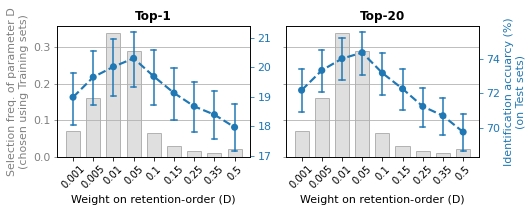

In [10]:
_msr_test__step = msr__step[(msr__step.set == "test")].reset_index()
_msr_baseline__step_test = msr_baseline__step[(msr_baseline__step.set == "test")].reset_index()
_msr_train__step = msr__step[(msr__step.set == "train")].reset_index()
_opt__step = _msr_train__step.iloc[_msr_train__step.groupby(["sample", "Dataset", "Ionization"]).idxmax()["topk_auc"]]

cts__step = np.array([np.sum(_opt__step.D == D) for D in D_range])
print(cts__step)
_x = np.arange(len(D_range))

fig, axrr = plt.subplots(1, 2, figsize=(7.5, 3), sharey="all")

for i, k in enumerate([1, 20]):
    ax_bar = axrr[i]
    ax_line = axrr[i].twinx()
    
    # Line-plot
    sns.pointplot(data=_msr_test__step, x="D", y="top%d" % k, linestyles="--", errwidth=1.5, capsize=0.25, scale=0.8, ax=ax_line, seed=2020)
    ax_line.set_ylabel("")    
    #ax_line.hlines(_msr_baseline_test["top%d" % k].mean(), -0.25, 8.25, color=sns.color_palette()[0])

    # Bar-plot
    ax_bar.bar(x=_x, height=cts__step / cts__step.sum(), width=0.7, alpha=0.25, edgecolor="black", color="grey")
    ax_bar.grid(axis="y")
    
    axrr[i].set_xlabel("Weight on retention-order (D)", fontsize=11)
    axrr[i].set_title("Top-%d" % k, fontweight="bold", fontsize=12)
    axrr[i].set_xticklabels(ax_line.get_xticklabels(), rotation=45)
    
    ax_line.tick_params(axis="y", colors=sns.color_palette()[0], labelsize=11)
    ax_bar.tick_params(axis="y", colors="gray", labelsize=11)
    
    if i == 0:
        ax_bar.set_ylabel("Selection freq. of parameter D\n(chosen using Training sets)", fontsize=11, color="gray")
    if i == 1:
        ax_line.set_ylabel("Identification accuarcy (%)\n(on Test sets)", fontsize=11, color=sns.color_palette()[0])

plt.tight_layout()